# Applying basic Logistic Regression model

# 1) Importing key modules

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
import re    # for regular expressions 
import nltk  # for text manipulation 
from nltk.corpus import stopwords
import string 
import pandas as pd
import pickle
import numpy as np
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [0]:
# For machine learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
#Evaluation part
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

# 2)- Working with data

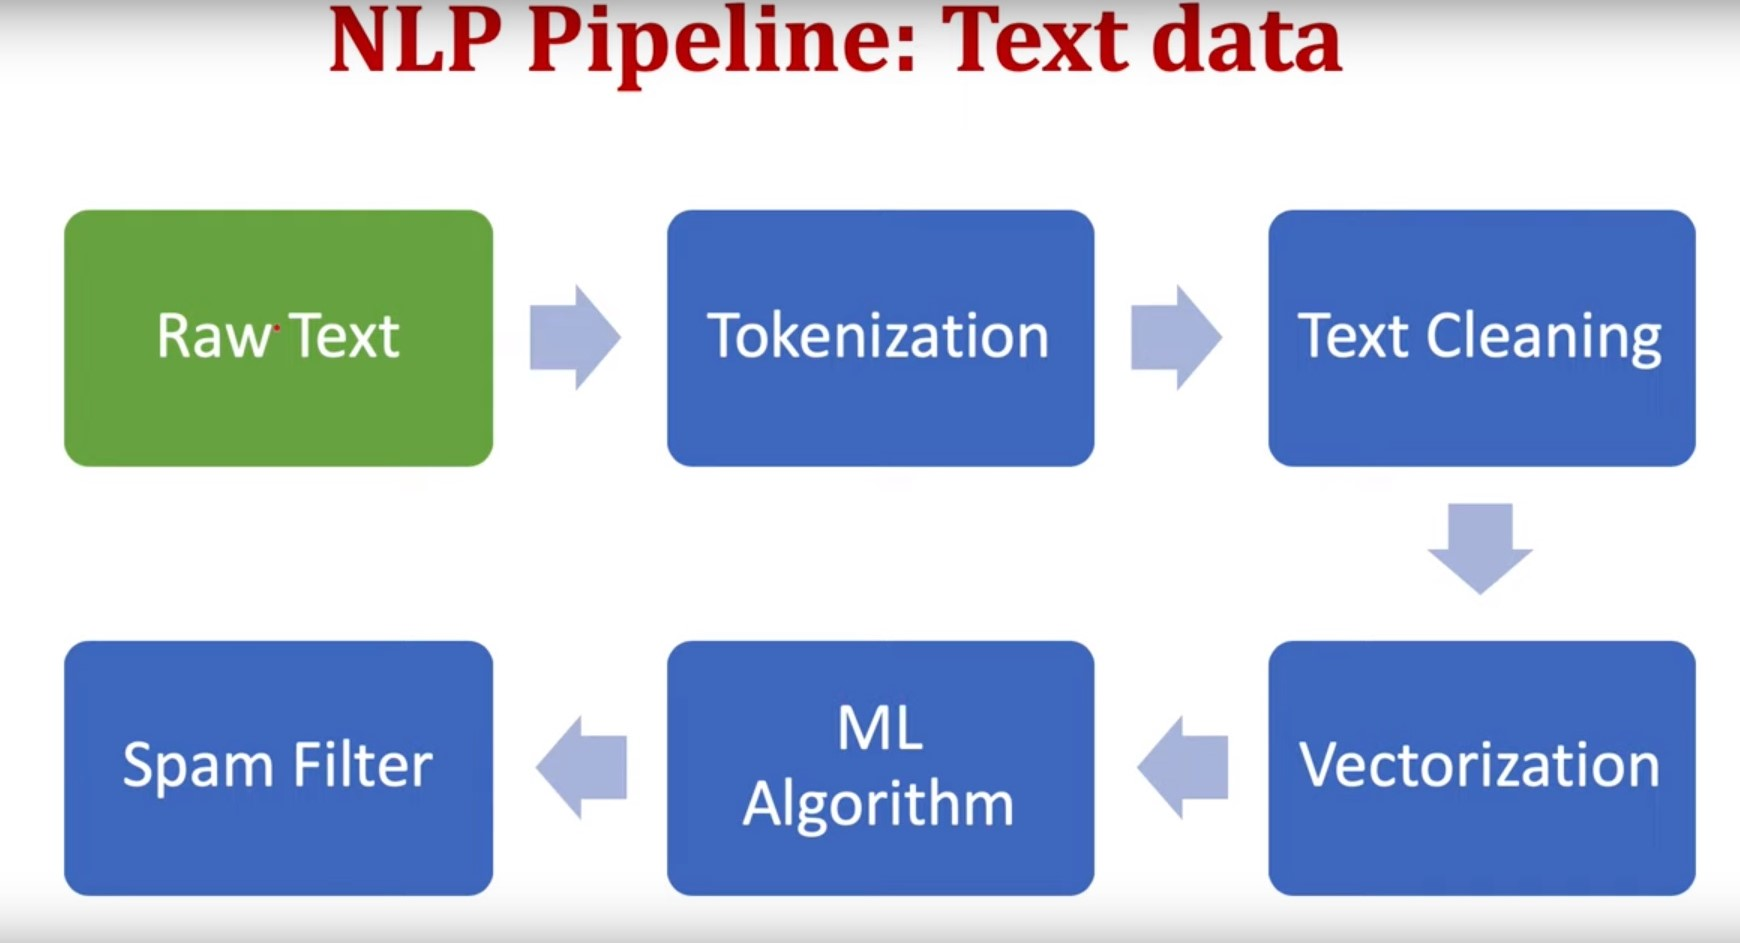

In [4]:
from IPython.display import Image
Image(filename='pipeline.jpg')

We have done cleaning part. Now we will perform next three steps

In [0]:
dataset=pd.read_pickle('data_clean.pkl')

In [6]:
dataset.head()

,label,sms,clean,cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",until jurong point crazy Available only bugis ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,Joking,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry wkly comp final tkts Text receive e...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,early already then,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",think go life around here though,nah think go usf life around though


### a. Dealing with categorical variables

In [7]:
dataset['label_cat']=dataset.label.map({'ham':0 , 'spam':1})
dataset.head()

,label,sms,clean,cleaned,label_cat
0,ham,"Go until jurong point, crazy.. Available only ...",until jurong point crazy Available only bugis ...,go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,Joking,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry wkly comp final tkts Text receive e...,free entry wkly comp win fa cup final tkts st ...,1
3,ham,U dun say so early hor... U c already then say...,early already then,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",think go life around here though,nah think go usf life around though,0


In [8]:
dataset.label.value_counts(normalize=True)

ham     0.865985
spam    0.134015
Name: label, dtype: float64

### b.Taking only concerned features 

In [9]:
# to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = dataset.cleaned
y = dataset.label_cat
print(X.shape)
print(y.shape)

(5574,)
(5574,)


### c.Splitting train-test 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4180,)
(1394,)
(4180,)
(1394,)


In [11]:
X_train[:5]

4657                                     k work something
1140    message text missing sender name missing numbe...
1552                         e msg jus u said thanks gift
4725    free game get rayman golf free game arcade st ...
710     mths half price orange line rental latest came...
Name: cleaned, dtype: object

In [12]:
y_train[:5]

4657    0
1140    0
1552    0
4725    1
710     1
Name: label_cat, dtype: int64

# 3)- Vectorizing our dataset

- vect.fit(train) learns the vocabulary of the training data
- vect.transform(train) uses the fitted vocabulary to build a document-term matrix from the training data
- vect.transform(test) uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

In [0]:
# instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [14]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
#create a document-term matrix
X_train_dtm = vect.transform(X_train)

In [16]:
type(X_train_dtm)

scipy.sparse.csr.csr_matrix

In [17]:
# examine the document-term matrix
X_train_dtm

<4180x6052 sparse matrix of type '<class 'numpy.int64'>'
	with 33630 stored elements in Compressed Sparse Row format>

In [18]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1394x6052 sparse matrix of type '<class 'numpy.int64'>'
	with 10394 stored elements in Compressed Sparse Row format>

**Do not fit test data.Only make sparse matrix. Fit means learning vocabulary. So, we only use train data for learning.**



In [19]:
type(X_test_dtm)

scipy.sparse.csr.csr_matrix

In [20]:
X_train_dtm.shape

(4180, 6052)

### convert sparse matrix to a dense matrix

Input to model will be in form of an array. 

In [21]:
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names()).head()

,aah,aaooooright,aathi,abbey,abeg,abel,aberdeen,abi,ability,abiola,abj,able,abnormally,aboutas,abroad,absence,absolutely,absolutly,abstract,abt,abta,abuse,abuser,ac,academic,acc,accent,accenture,accept,access,accessible,accidant,accident,accidentally,accommodation,accommodationvouchers,accomodate,accomodations,accordin,accordingly,...,yet,yetty,yetunde,yf,yhl,yijue,ym,ymca,yo,yoga,yogasana,yor,yorge,youi,young,younger,youphone,youre,yourjob,youwanna,yoville,yowifes,yoyyooo,yr,yt,ything,yummmm,yummy,yun,yunny,yuo,yup,zaher,zealand,zebra,zed,zhong,zoe,zoom,zouk
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train_dense= X_train_dtm.toarray()

In [24]:
# same with X_test

X_test_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
pd.DataFrame(X_test_dtm.toarray(), columns=vect.get_feature_names()).head()

,aah,aaooooright,aathi,abbey,abeg,abel,aberdeen,abi,ability,abiola,abj,able,abnormally,aboutas,abroad,absence,absolutely,absolutly,abstract,abt,abta,abuse,abuser,ac,academic,acc,accent,accenture,accept,access,accessible,accidant,accident,accidentally,accommodation,accommodationvouchers,accomodate,accomodations,accordin,accordingly,...,yet,yetty,yetunde,yf,yhl,yijue,ym,ymca,yo,yoga,yogasana,yor,yorge,youi,young,younger,youphone,youre,yourjob,youwanna,yoville,yowifes,yoyyooo,yr,yt,ything,yummmm,yummy,yun,yunny,yuo,yup,zaher,zealand,zebra,zed,zhong,zoe,zoom,zouk
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Note columns of X_train and X_test 's dense matrix are of same size. Only rows are different as per split'

In [0]:
X_test_dense= X_test_dtm.toarray()

# 4.) Model

For simplicity, we will use Logistic Model

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [28]:
# train the model using X_train_dense
logreg.fit(X_train_dense, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# make class predictions for X_test_dtm
y_pred = logreg.predict(X_test_dense)

In [30]:
y_pred[:5]

array([0, 0, 0, 1, 0])

In [31]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dense)
y_pred_prob

array([[0.98896006, 0.01103994],
       [0.99289841, 0.00710159],
       [0.99242852, 0.00757148],
       ...,
       [0.99601599, 0.00398401],
       [0.00492003, 0.99507997],
       [0.99220071, 0.00779929]])

In [32]:
# for class 1 i.e spam sms
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob[:5]

array([0.01103994, 0.00710159, 0.00757148, 0.85275724, 0.01136806])

# 5)-Evaluate Model

### a.Null accuracy

accuracy that could be achieved by always predicting the most frequent class

In [33]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    1212
1     182
Name: label_cat, dtype: int64

In [34]:
# calculate the percentage of ones i.e Spams
y_test.mean()

0.13055954088952654

In [35]:
# calculate the percentage of zeros i.e ham
1 - y_test.mean()

0.8694404591104734

In [36]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.8694404591104734

So, a rough model will have accuracy of 86.9% which is very high already

### b.Making the confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

Key matrix elements are:<br>
- true positives (TP): These are cases in which we predicted yes (they have the purchased), and they do have the purchases.
- true negatives (TN): We predicted no, and they don't have purchased.
- false positives (FP): We predicted yes, but they have actually not the purchased. (Also known as a "Type I error.")
- false negatives (FN): We predicted no, but they actually ourchased. (Also known as a "Type II error.")

In [0]:
import itertools
from sklearn import metrics
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Spectral):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1210,    2],
       [  20,  162]])

In [0]:
#save confusion matrix and slice into four piece
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

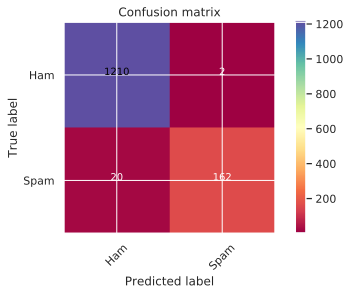

In [40]:
# False=0; True=1 ====> Ham=0, Spam=1
plot_confusion_matrix(cm, classes=['Ham', 'Spam'])

### c. Classification Accuracy

Overall, how often is the classifier correct?

In [41]:
metrics.accuracy_score(y_test, y_pred)

0.9842180774748924

In [42]:
print((TP + TN) / float(TP + TN + FP + FN))

0.9842180774748924


### d.Classification Error

Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [43]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred))

0.015781922525107604
0.015781922525107572


# 6)- Other matrices

- sensitivity
- precision
- specificity

### a. Sensitivity
When the actual value is positive, how often is the prediction correct?

How "sensitive" is the classifier to detecting positive instances? Also known as "True Positive Rate" or "Recall"

In [44]:
print(recall_score(y_test, y_pred))

0.8901098901098901


In [45]:
print(TP / float(TP + FN))

0.8901098901098901


### b.Specificity

When the actual value is negative, how often is the prediction correct?

How "specific" (or "selective") is the classifier in predicting positive instances?

In [46]:
# No sklearn buildin

print(TN / float(TN + FP))

0.9983498349834984


### c.False Positive Rate
When the actual value is negative, how often is the prediction incorrect?

In [47]:
print(FP / float(TN + FP))

0.0016501650165016502


### d.Precision
When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [48]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred))

0.9878048780487805
0.9878048780487805


### classification_report

Like a summary table

In [49]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1212
           1       0.99      0.89      0.94       182

    accuracy                           0.98      1394
   macro avg       0.99      0.94      0.96      1394
weighted avg       0.98      0.98      0.98      1394



**Which metrics should you focus on?**

Choice of metric depends on your business objective 

- Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

# 7)-Adjusting the classification threshold

As we have imbalanced class. So, we have higher accuracy for Ham sms. But, we do not predict Spam sms that well. In this case, we might be more interested in Positive cases. Though we can see in example that we are already fine with focusing on Precision or Specificity matric which are very good for our model yet we would like to experiment a little 

In [50]:
# print the first 10 predicted responses
logreg.predict(X_test_dense)[0:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [51]:
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

### 7.1)-predict_proba

In [52]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test_dense)[0:10, :]

array([[9.88960057e-01, 1.10399427e-02],
       [9.92898407e-01, 7.10159265e-03],
       [9.92428521e-01, 7.57147901e-03],
       [1.47242759e-01, 8.52757241e-01],
       [9.88631940e-01, 1.13680602e-02],
       [9.99210979e-01, 7.89021275e-04],
       [1.42741991e-03, 9.98572580e-01],
       [9.90144902e-01, 9.85509812e-03],
       [9.86725763e-01, 1.32742368e-02],
       [9.82844010e-01, 1.71559900e-02]])

In [53]:
# Prediction for Spam SMS
logreg.predict_proba(X_test_dense)[0:10, 1]

array([1.10399427e-02, 7.10159265e-03, 7.57147901e-03, 8.52757241e-01,
       1.13680602e-02, 7.89021275e-04, 9.98572580e-01, 9.85509812e-03,
       1.32742368e-02, 1.71559900e-02])

In [54]:
pred_prob_cl_one = logreg.predict_proba(X_test_dense)[:, 1]
print(pred_prob_cl_one[:5])

[0.01103994 0.00710159 0.00757148 0.85275724 0.01136806]


Text(0, 0.5, 'Frequency')

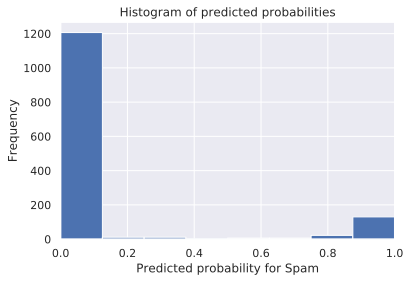

In [55]:
# histogram of predicted probabilities for spammed SMS
plt.hist(pred_prob_cl_one, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for Spam')
plt.ylabel('Frequency')

### 7.2)-Decrease the threshold

for predicting SPAM SMS in order to increase the sensitivity of the classifier

In [0]:
from sklearn.preprocessing import binarize
y_pred_class_spec = binarize([pred_prob_cl_one], 0.1)[0]

In [60]:
y_pred_class_spec[0:10]

array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0.])

In [75]:
y_pred_prob[0:10]

array([1.10399427e-02, 7.10159265e-03, 7.57147901e-03, 8.52757241e-01,
       1.13680602e-02, 7.89021275e-04, 9.98572580e-01, 9.85509812e-03,
       1.32742368e-02, 1.71559900e-02])

In [61]:
#old confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[1210    2]
 [  20  162]]


In [62]:
# new confusion matrix (threshold of 0.1)
print(metrics.confusion_matrix(y_test, y_pred_class_spec))

[[1193   19]
 [   6  176]]


In [63]:
# new recall 
print(recall_score(y_test, y_pred_class_spec))

0.967032967032967


In [64]:
#old recall
print(recall_score(y_test, y_pred))

0.8901098901098901


Sensitivity has increased significantly. Now, we can predict Spam values with better confidence

In [65]:
print(metrics.precision_score(y_test, y_pred_class_spec))
print(metrics.precision_score(y_test, y_pred))

0.9025641025641026
0.9878048780487805


Precision has gone down. It is like a trade-off.As said, this was an experiment and only to add bonus part to excercise. 

### 7.3)-ROC curve

with new threshold

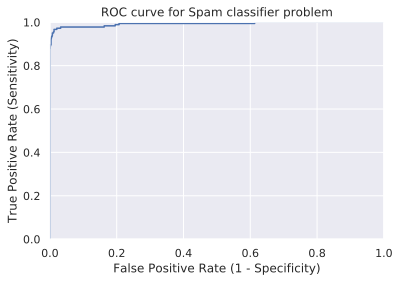

In [66]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_cl_one)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Spam classifier problem')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [0]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [68]:
evaluate_threshold(0.5)

Sensitivity: 0.8901098901098901
Specificity: 0.9983498349834984


In [69]:
evaluate_threshold(0.9)

Sensitivity: 0.6373626373626373
Specificity: 1.0


In [70]:
evaluate_threshold(0.1)

Sensitivity: 0.967032967032967
Specificity: 0.9876237623762376


In [71]:
print(classification_report(y_test, y_pred_class_spec))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1212
           1       0.90      0.97      0.93       182

    accuracy                           0.98      1394
   macro avg       0.95      0.98      0.96      1394
weighted avg       0.98      0.98      0.98      1394



**Hence, our classifer is more sensitive for Spam SMS detection and less precise towards Ham SMS detection.**

### 7.3)-AUC
AUC is the percentage of the ROC plot that is underneath the curve:

Using new threshold

In [72]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, pred_prob_cl_one))

0.9927646610814929


In [73]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9927646610814929

- AUC is useful as a single number summary of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
- Greater value close to 1 is better. If lower value i.e 0.5 then it is random guessing. In our case, it is good value

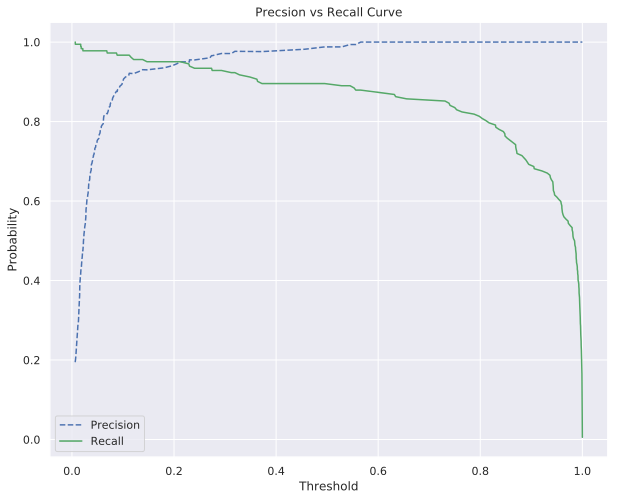

In [74]:
from sklearn.metrics import roc_curve, precision_recall_curve
prec, rec, thres = precision_recall_curve(y_test, pred_prob_cl_one)

def _plot_prec_rec_curve(prec, rec, thres):
    plot_pr = plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()
    #return plot_pr(it creates duplicate graph)

_plot_prec_rec_curve(prec, rec, thres)